### make_mockobs_forpaper

Script that runs the making mock observations scripts and output specifically to put in the paper


In [12]:
%run 'make_mockobs.ipynb'

In [2]:
machine='chinook'

In [3]:
resolution = None;  # This should prompt the script to just use the lowest resolution 

slicewidth = 20; 
exptime = 1000.*60.*60.; 
CMOS = True; ROnoise= None; 

x_center = 50.5; y_center = 13.5


****** Working on mock observation for distance 500Mpc ******
loading the data...
Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 500Mpc is 1.28107372426.
1.28107372426 is less than the Dragonfly resolution (2.8) so (if resolution = None) would bin data by 2.0.
Final resolution would be 2.56214744851
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_500Mpc_3arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_500Mpc_3arcsec_20slwd.npz was saved as a tuple (len(data)==4), so we can return it directly.
DEBUG: the resolution outputted from load_data is 2.56214744851
extracting the FOV...
making a mask for the data
4216 2810
26.35 17.5625
0.00625
(4236, 2830)
(1, 1)
(1, 1)

(3, 3)
(3, 3)

(7, 7)
(7, 7)

(3, 3)
(3, 3)

(3, 3)
(3, 3)

(5, 5)
(5, 5)

(1, 1)
(1, 1)

(3, 3)
(3, 3)

(5, 5)
(5, 5)

(3, 3)
(3, 3)

(3, 3)
(3, 3)

(3, 3)
(3, 3)

(3, 3)
(3, 3)

(3, 3)
(3, 3)

(3, 3)
(3

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The current mask is [[-1.9468432664871216 -1.95846688747406 -1.9708131551742554 ...,
  -1.949060082435608 -1.9469326734542847 -1.9437975883483887]
 [-1.9399142265319824 -1.9518675804138184 -1.964518427848816 ...,
  -1.9496976137161255 -1.9466694593429565 -1.9427236318588257]
 [-1.93411123752594 -1.9462429285049438 -1.9591518640518188 ...,
  -1.9494448900222778 -1.9458192586898804 -1.94147527217865]
 ..., 
 [-1.726587176322937 -1.728745698928833 -1.7372703552246094 ...,
  -2.8838613033294678 -2.876758575439453 -2.8692009449005127]
 [-1.694938063621521 -1.7012462615966797 -1.7155102491378784 ...,
  -2.8766250610351562 -2.8697762489318848 -2.862522602081299]
 [-1.678378939628601 -1.6859631538391113 -1.7025612592697144 ...,
  -2.8692305088043213 -2.8626883029937744 -2.855822801589966]]
adding noise to the data...
******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 2.56214744851
DEBUGGI

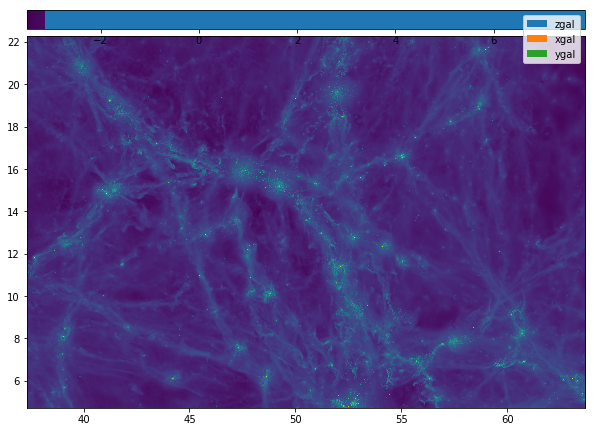

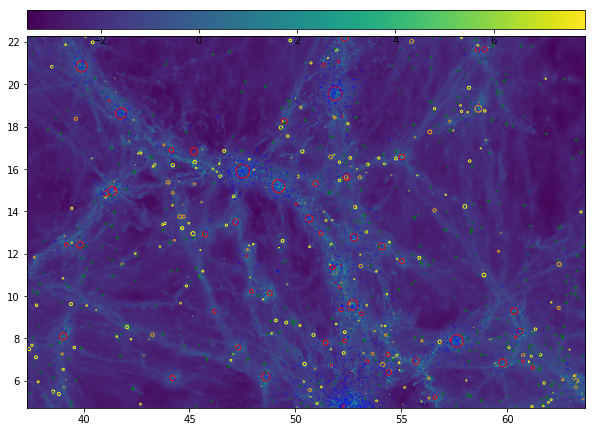

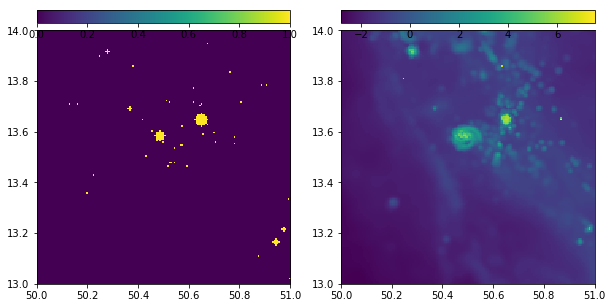

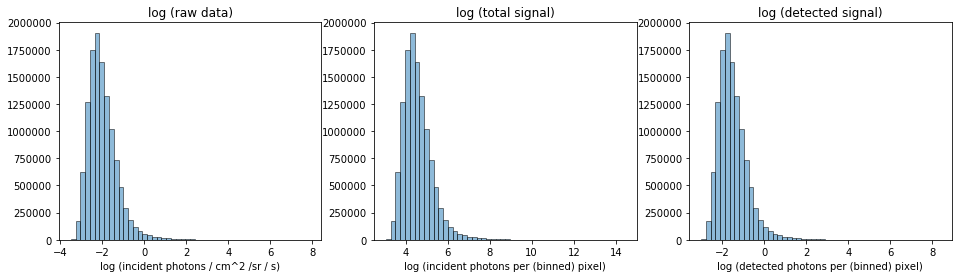

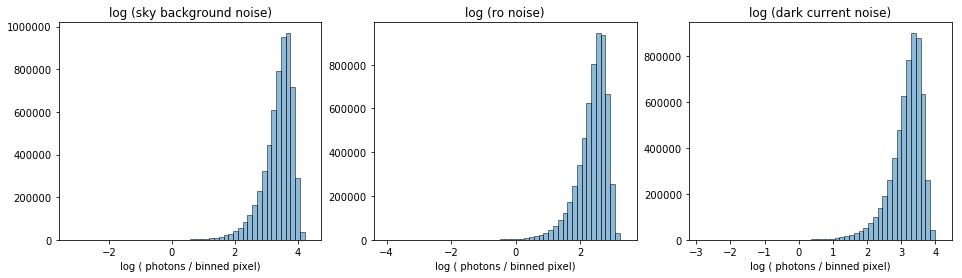

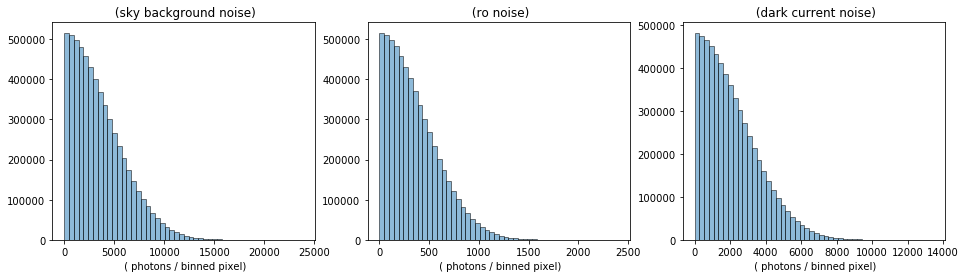

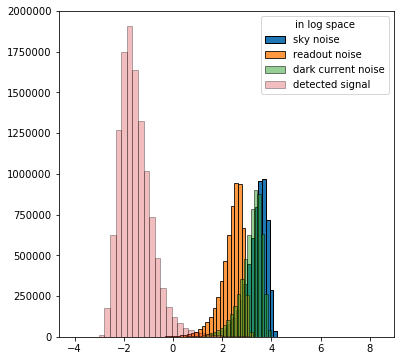

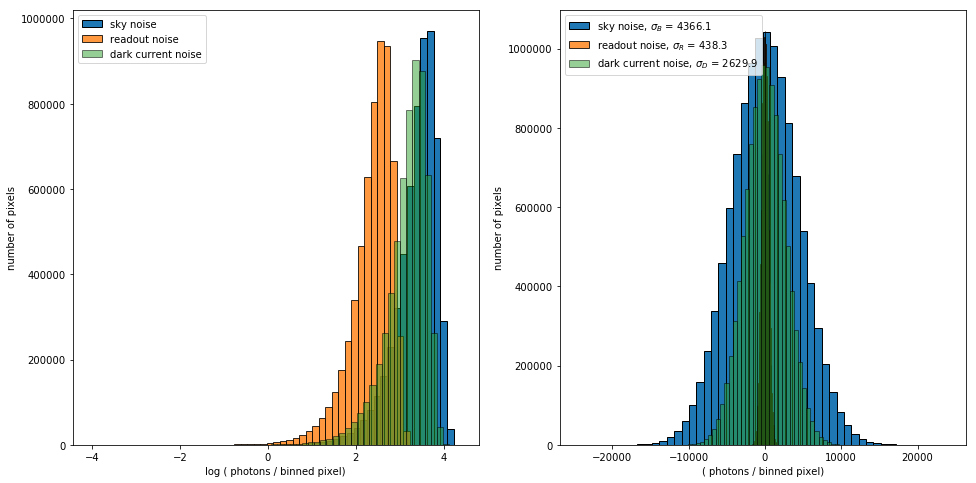

In [13]:
distance = '500Mpc'
stuff_500 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,\
                          x_center=x_center,y_center=y_center,includemeannoise=True,mask=True,debug=True,plotchecks=True)
data_FOV_500, xystarts_500, size_500, noiseadded_signal_500, B_sky_array_500, R_array_500,D_array500,mask_500 = stuff_500

#distance = '200Mpc'
#data_FOV_200, xystarts_200, size_200, noiseadded_signal_200, B_sky_array_200, R_array_200,D_array200 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center)

#distance = '100Mpc'
#stuff_100 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,\
#                          x_center=x_center,y_center=y_center,includemeannoise=True,mask=True,debug=True,plotchecks=True)
#data_FOV_100, xystarts_100, size_100, noiseadded_signal_100, B_sky_array_100, R_array_100,D_array100, mask_100 = stuff_100

#distance = '50Mpc'
#stuff_50 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,\
#                         x_center=x_center,y_center=y_center,includemeannoise=True,mask=True,debug=True,plotchecks=True)
#data_FOV_50, xystarts_50, size_50, noiseadded_signal_50, B_sky_array_50, R_array_50,D_array50,mask_50 = stuff_50

### checking that the masking is done correctly, since the image of the mask above got warped weirdly
... and it's all good -- just warping of the image makes the mask look non-circular and weird.

(80, 80)
[[False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False  True False
  False False False False False False Fals

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


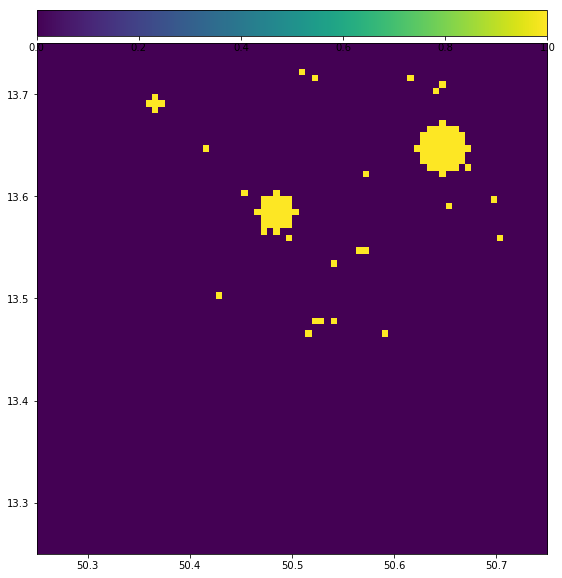

In [31]:
def pltcutout2(data_FOV,xystarts,size,ax=None):
    xpixsize,ypixsize = data_FOV.shape
    xlength,ylength = size
    midx=xpixsize/2; midy=ypixsize/2
    boxlength = 0.5 #Mpc
    pixsizex=xpixsize/xlength*boxlength
    data_cutout = data_FOV[midx-pixsizex/2:midx+pixsizex/2,midy-pixsizex/2:midy+pixsizex/2]
        
    xystarts_x = xystarts[0] + (midx-pixsizex/2)/(xpixsize/xlength)
    xystarts_y = xystarts[1] + (midy-pixsizex/2)/(ypixsize/ylength)
    size_new = [boxlength,boxlength]

    pltimg(data_cutout,[xystarts_x,xystarts_y],size_new,ax=ax)
    return data_cutout

fig, (ax) = plt.subplots(1, 1, figsize=(10, 10))
data_cutout = pltcutout2(mask_500,xystarts_500,size_500,ax=ax)
print data_cutout.shape
print data_cutout[10:20,60:80]
print data_cutout[70:80,10:20]

In [ ]:
mx_simulation = np.ma.masked_array(data_FOV_100, mask=mask_100)
mx_noisy = np.ma.masked_array(noiseadded_signal_100, mask=mask_100)


In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mask_100.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mx_simulation.T,ax=ax1,colorbar=True)#,bounds=bounds)


In [ ]:
rawsim_cutout = data_FOV_100[800:1000,500:700]
rawsimmasked = np.ma.masked_array(data_FOV_100, mask=mask_100)
rawsimmasked_cutout = rawsimmasked[800:1000,500:700]

noise_cutout = noiseadded_signal_100[800:1000,500:700]
#mx_noisy = np.ma.masked_array(noiseadded_signal_100-768000.0-27648000.0-76310797.0337, mask=mask_100)
mx_noisy = np.ma.masked_array(noiseadded_signal_100, mask=mask_100)
noisemasked_cutout = mx_noisy[800:1000,500:700]

mx_noisy.data.shape

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 16))
plotdata(rawsim_cutout.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 16))
plotdata(rawsimmasked_cutout.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 16))
plotdata(np.log10(noise_cutout-768000.0-27648000.0-76310797.0337).T,ax=ax1,colorbar=True)#,bounds=bounds)
# subtracted off the mean noise I added in - it is printed out above

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 16))
plotdata(np.log10(noisemasked_cutout-768000.0-27648000.0-76310797.0337).T,ax=ax1,colorbar=True)#,bounds=bounds)
